In [138]:
import pandas as pd

invoice = pd.read_csv('Downloads/fct_invoice.csv')
customer = pd.read_json('Downloads/dim_customer.json')

df = pd.merge(customer, invoice, left_on='id',right_on='customer_id',how='inner')

# How many unique customers are in the dataset?

In [148]:
print(len(customer.index))

5191


# What are the different categories of products available? How many unique categories are there?

In [143]:
print(df['category'].unique())
print(df['category'].nunique())

['Shoes' 'Cosmetics' 'Books' 'Toys' 'Clothing' 'Food & Beverage'
 'Technology' 'Souvenir']
8


# Which payment method is the most popular? How many times was it used?

In [151]:
print(df['payment_method'].value_counts().idxmax())
print(df['payment_method'].value_counts()['Cash'])

Cash
44447


# What are the three most popular categories, by total sales?

In [150]:
df['sales'] = df['quantity'] * df['price']
print(df.groupby('category')['sales'].sum().nlargest(3).index.tolist())

['Clothing', 'Shoes', 'Technology']


#  What are the total sales attributed to customers over the age of 45?

In [153]:
print(df.loc[df['age'] > 45, 'sales'].sum())

82039768.14999999


# How is the data distributed across different invoice dates? Are there any seasonal trends or patterns? (Use a graph for this.)

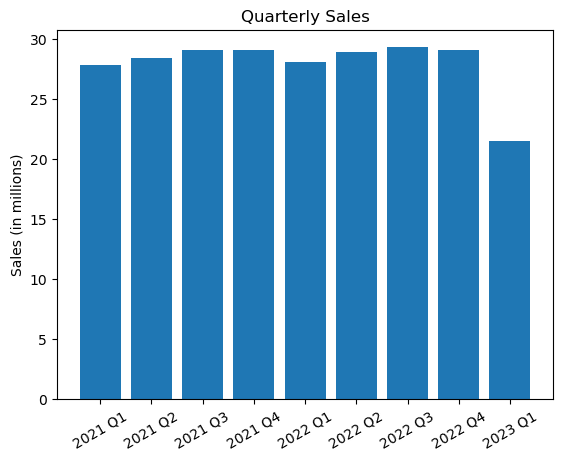

In [411]:
import matplotlib.pyplot as plt

year_list = df['year'].unique().tolist()
year_list.sort()
quarterly_sales_by_year = []
quarterly_sales = []
quarters = ['Q1','Q2','Q3','Q4']
num_quarters = []
x_axis = []

for year in year_list:
    quarterly_sales_by_year.append(list(df.loc[df['year'] == year].groupby(df.date.dt.quarter)['sales'].sum()/1000000))
    quarterly_sales.extend(list(df.loc[df['year'] == year].groupby(df.date.dt.quarter)['sales'].sum()/1000000))
    
for i in range(3):
    num_quarters.append(len(quarterly_sales_by_year[i]))
    
for year, num_quarter in zip(year_list, num_quarters):
    for quarter in range(1, num_quarter + 1):
        x_axis.append(f"{year} Q{quarter}")

fig, ax = plt.subplots()

ax.bar(x_axis, quarterly_sales)

ax.set_ylabel('Sales (in millions)')
ax.set_title('Quarterly Sales')
plt.xticks(rotation=30)
plt.show()

# Create a pivot table showing the breakdown of sales across these dimensions, in this order: category, decade age range (e.g., 10-19, 20-29, and so forth).

In [516]:
categories = list(df['category'].unique())

labels = []
for i in range(10):
    start_age = i * 10
    end_age = start_age + 9
    range_label = f"{start_age}-{end_age}"
    labels.append(range_label)

    bins = [0, 9, 19, 29, 39, 49, 59, 69, 79, 89, 99]
df['age_range'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

pd.pivot_table(df, values='sales', index='category', columns='age_range', aggfunc='sum')


age_range,0-9,10-19,20-29,30-39,40-49,50-59,60-69,70-79,80-89,90-99
category,,,,,,,,,,
Books,0.0,7923.45,76022.70,87157.95,87885.15,72735.15,81885.75,57706.35,29224.35,0.0
Clothing,0.0,1144505.12,9959955.28,11540776.72,11447451.84,9943150.80,11083154.72,8061649.20,4812382.96,0.0
Cosmetics,0.0,65991.18,583796.28,731310.76,682396.78,563954.20,669832.84,443722.58,274495.66,0.0
Food & Beverage,0.0,9434.92,68633.29,87911.07,91922.48,72132.16,81488.63,58256.97,33879.94,0.0
Shoes,0.0,634379.69,5571978.28,7303468.73,7163028.95,5778436.76,6131336.72,4675324.30,2827400.87,0.0
Souvenir,0.0,6181.71,54438.93,63834.66,68444.55,54966.78,57418.35,38216.34,26662.29,0.0
Technology,0.0,739200.00,5053650.00,6298950.00,6082650.00,4458300.00,5421150.00,3808350.00,2134650.00,0.0
Toys,0.0,35911.68,366392.32,424704.00,408253.44,330516.48,370693.12,293888.00,162856.96,0.0
